In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Import data sets and Load data set
### Hint: Make use of with statement and write a function to load the data if you are not able to load through the panda's method.


In [2]:
df=pd.read_csv('bank.csv',sep="\;")

C:\Users\KHUSHI\AppData\Local\Temp\ipykernel_40772\396931465.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('bank.csv',sep="\;")


In [3]:
df.head()

,"""age","""""job""""","""""marital""""","""""education""""","""""default""""","""""balance""""","""""housing""""","""""loan""""","""""contact""""","""""day""""","""""month""""","""""duration""""","""""campaign""""","""""pdays""""","""""previous""""","""""poutcome""""","""""y"""""""
0,"""30","""""unemployed""""","""""married""""","""""primary""""","""""no""""",1787,"""""no""""","""""no""""","""""cellular""""",19,"""""oct""""",79,1,-1,0,"""""unknown""""","""""no"""""""
1,"""33","""""services""""","""""married""""","""""secondary""""","""""no""""",4789,"""""yes""""","""""yes""""","""""cellular""""",11,"""""may""""",220,1,339,4,"""""failure""""","""""no"""""""
2,"""35","""""management""""","""""single""""","""""tertiary""""","""""no""""",1350,"""""yes""""","""""no""""","""""cellular""""",16,"""""apr""""",185,1,330,1,"""""failure""""","""""no"""""""
3,"""30","""""management""""","""""married""""","""""tertiary""""","""""no""""",1476,"""""yes""""","""""yes""""","""""unknown""""",3,"""""jun""""",199,4,-1,0,"""""unknown""""","""""no"""""""
4,"""59","""""blue-collar""""","""""married""""","""""secondary""""","""""no""""",0,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",226,1,-1,0,"""""unknown""""","""""no"""""""


In [4]:
# removing quotes from values 
for i in df.columns:
     df[i]=df[i].apply(lambda x:str(x).strip(''''""""'''))

df.columns=df.columns.map(lambda x:x.strip('""'))
    

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## 2. Make the data proper to make use of data for analysis

### A.	 Identify the Features data types before entering into the analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


### B.	.Convert the datatypes which are wrongly identified according to the business(domain). Kindly use the User Defined function and loop to convert the data types once.

In [7]:
def cov(x):
    for i in x:
        if i in ('age','day','duration','campaign','pdays','previous'):
            df[i]=df[i].astype(int)
        elif i=='balance':
            df[i]=df[i].astype(float)
cov(df.columns)

In [8]:
df.dtypes

age            int32
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int32
month         object
duration       int32
campaign       int32
pdays          int32
previous       int32
poutcome      object
y             object
dtype: object

### C.	Find and Remove missing if any. Use visualization to find the missing values or Use general method to find the missing values.

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### D. Find duplicates (if necessary)

In [10]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


# Check Point 2:|

##  3. Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization.

In [11]:
df.rename(columns={'y':'subscription'},inplace=True)

In [12]:
a=df.groupby('subscription')['balance'].mean()
print(f'''the averge balance of the subscription customer {a['yes']} 
the averge balance of the non-subscription customer {a['no']}''')

the averge balance of the subscription customer 1571.9558541266795 
the averge balance of the non-subscription customer 1403.21175


<AxesSubplot:xlabel='subscription', ylabel='balance'>

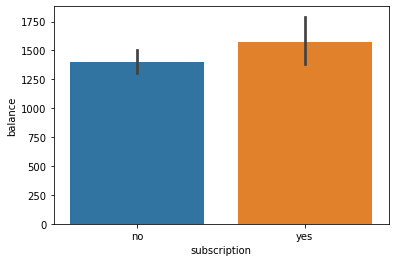

In [13]:
sns.barplot(x=df['subscription'],y=df['balance'])

## 4 . Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.

In [14]:
b=df.groupby('education')['education'].count()
b

education
primary       678
secondary    2306
tertiary     1350
unknown       187
Name: education, dtype: int64

([<matplotlib.patches.Wedge at 0x1dde327f160>,
 [Text(0.9801592249869853, 0.4992873858539915, 'primary'),
  Text(-0.9097842946621081, 0.6182980973496284, 'secondary'),
  Text(0.40065496717397947, -1.0244391623121492, 'tertiary'),
  Text(1.0907260280899376, -0.14253677296455455, 'unknown')],
 [Text(0.5346323045383555, 0.27233857410217716, '15.00%'),
  Text(-0.4962459789066044, 0.3372535076452518, '51.01%'),
  Text(0.21853907300398878, -0.5587849976248085, '29.86%'),
  Text(0.5949414698672386, -0.07774733070793884, '4.14%')])

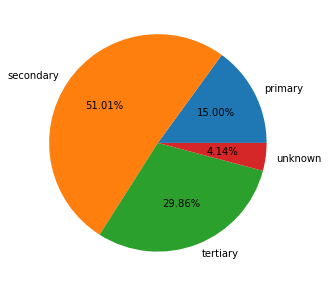

In [15]:
plt.figure(figsize=(12,5))
plt.pie(x=b.values,labels=b.index,autopct='%.2f%%')

## 5. Create a function that should be able to create a new feature(Variable) called season using the month column.

In [16]:
df['season']=list(map(lambda x: 'winter' if x  in ('dec','jan','feb') else 'summer' if x in ('mar','apr','may') else 'monsoon' if x in ('jun','jul','aug') else 'autumn',df['month']))

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription,season
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1,-1,0,unknown,no,autumn
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1,339,4,failure,no,summer
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1,330,1,failure,no,summer
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,monsoon
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,monsoon
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,summer
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11,-1,0,unknown,no,monsoon
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4,211,3,other,no,winter


## 6. Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution.

<AxesSubplot:xlabel='season', ylabel='count'>

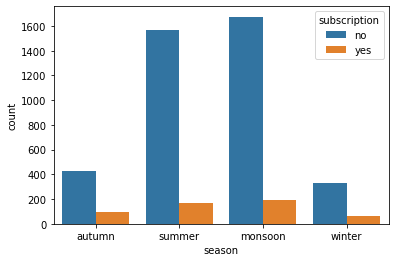

In [18]:
sns.countplot(x=df['season'],hue=df['subscription'])

## 7.Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.

<AxesSubplot:xlabel='pdays', ylabel='subscription'>

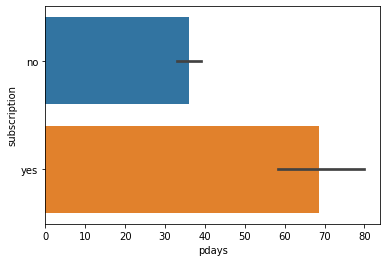

In [19]:
sns.barplot(x=df['pdays'],y=df['subscription'])

<AxesSubplot:xlabel='pdays', ylabel='freq'>

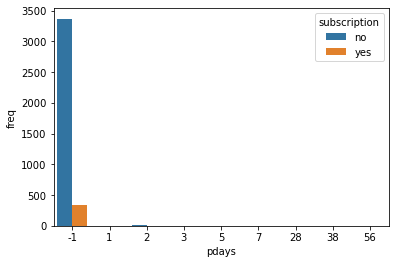

In [20]:
a=df.groupby('pdays')['subscription'].value_counts()
b = pd.DataFrame(a).rename(columns = {'subscription':'freq'}).reset_index()
c = b[0:10]
c
sns.barplot(data = c, x = 'pdays', y='freq', hue = 'subscription')

## 8. Replace the -1 as nan values for the P-days store.

In [21]:
df['pdays']=list(map(lambda x : x if x!=-1 else np.nan,df['pdays']))

In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription,season
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1,NaN,0,unknown,no,autumn
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1,339.0,4,failure,no,summer
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1,330.0,1,failure,no,summer
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no,monsoon
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5,NaN,0,unknown,no,monsoon
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1,NaN,0,unknown,no,summer
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11,NaN,0,unknown,no,monsoon
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4,211.0,3,other,no,winter


## 9. Once you are done with question number 8, do the same analysis as question number 7. And observe the difference between question number 7 and question number 9.

<AxesSubplot:xlabel='pdays', ylabel='freq'>

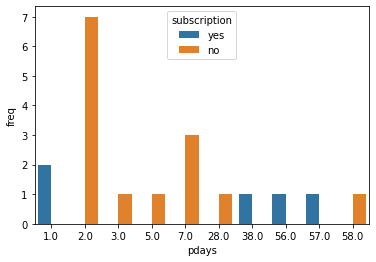

In [32]:
a=df.groupby('pdays')['subscription'].value_counts()
b = pd.DataFrame(a).rename(columns = {'subscription':'freq'}).reset_index()
c = b[0:10]
c
sns.barplot(data = c, x = 'pdays', y='freq', hue = 'subscription')

### 10. Does the customer take the term subscription who has less than 0 balance?
### Hint: Use any kind of plot which would you the related information to this question.


<AxesSubplot:xlabel='subscription', ylabel='count'>

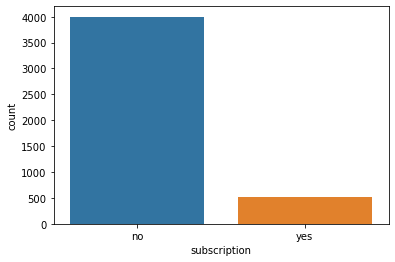

In [24]:
balance=df[df['balance']< 0]
sns.countplot(data=balance,x=df['subscription'])

## 11. Use Pivot table to find the maximum balance for each type of job.

In [25]:
pd.pivot_table(data=df,values='balance',index='job',aggfunc='max')

,balance
job,
admin.,22171.0
blue-collar,16353.0
entrepreneur,42045.0
housemaid,26965.0
management,27359.0
retired,71188.0
self-employed,16430.0
services,26394.0
student,11555.0


### 12. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed.

<AxesSubplot:xlabel='age', ylabel='balance'>

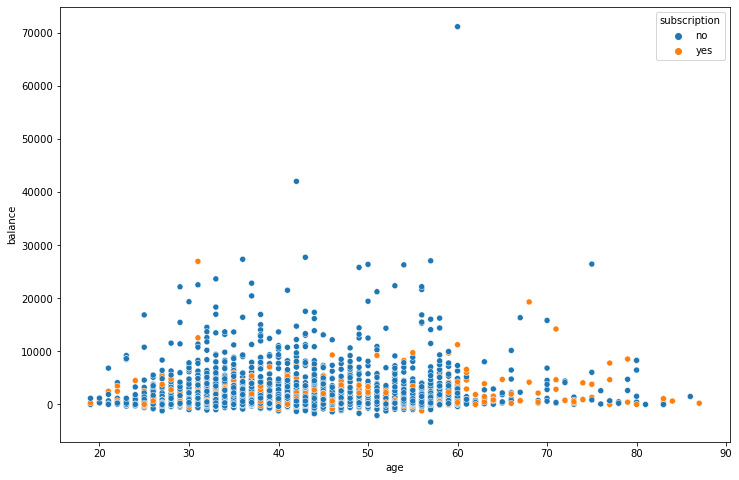

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='age',y='balance',hue='subscription')

### 13. Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one.

<AxesSubplot:xlabel='subscription', ylabel='balance'>

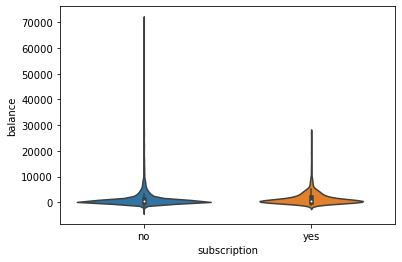

In [27]:
sns.violinplot(data=df,x='subscription',y='balance')

<AxesSubplot:xlabel='subscription', ylabel='balance'>

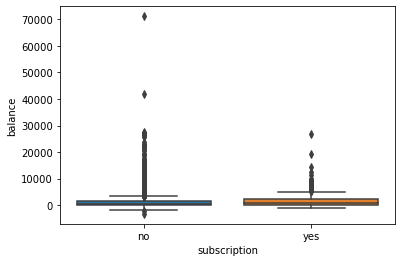

In [28]:
sns.boxplot(data=df,x='subscription',y='balance')

### 14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.
#### Note: Try to explore more parameters that are there in the pie-plot method.


([<matplotlib.patches.Wedge at 0x1dde36f07f0>,
 [Text(-1.0984663774848176, 0.05806563127515649, 'no'),
  Text(1.0984663815621873, -0.058065554140773266, 'yes')],
 [Text(-0.5991634786280823, 0.031672162513721715, '98.32%'),
  Text(0.5991634808521021, -0.03167212044042178, '1.68%')])

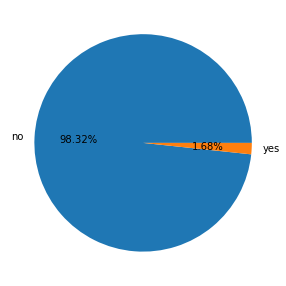

In [29]:
d=df['default'].value_counts()
plt.figure(figsize=(20,5))
plt.pie(x=d,labels=d.index,autopct='%.2f%%')

### 15.. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.

<AxesSubplot:xlabel='subscription', ylabel='pdays'>

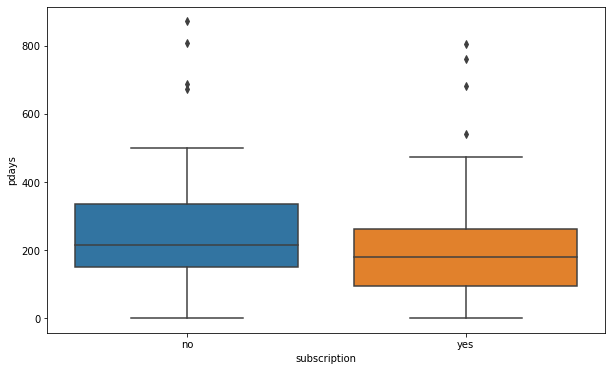

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='subscription',y='pdays')

<AxesSubplot:xlabel='subscription', ylabel='pdays'>

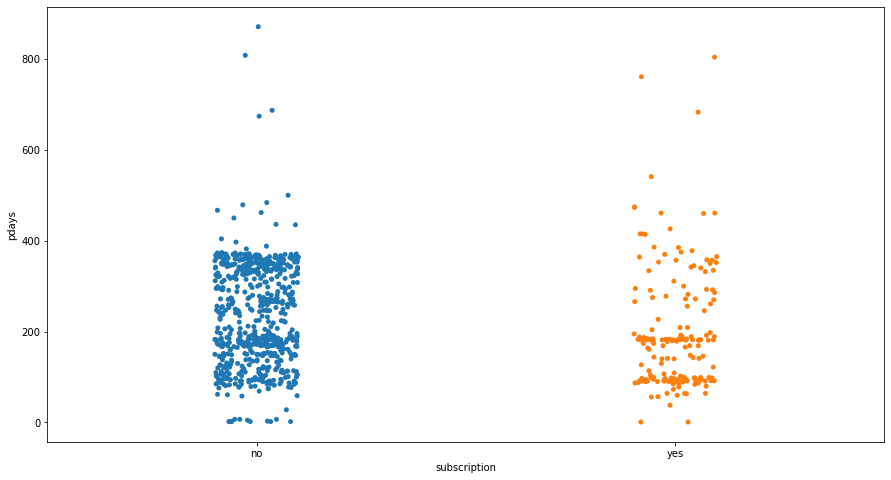

In [34]:
plt.figure(figsize=(15,8))
sns.stripplot(data=df,x='subscription',y='pdays')